In [8]:
print("=" * 80)
print("TEMPERATUR-ANALYSE ZUSAMMENFASSUNG")
print("=" * 80)

print(f"\n📊 ALLGEMEINE STATISTIKEN:")
print(f"  Zeitraum: {weather_df['Datum'].min().strftime('%d.%m.%Y')} bis {weather_df['Datum'].max().strftime('%d.%m.%Y')}")
print(f"  Anzahl Tage: {len(weather_df)}")
print(f"  Jahre: {(weather_df['Datum'].max() - weather_df['Datum'].min()).days / 365.25:.1f}")

print(f"\n🌡️ TEMPERATUR-STATISTIKEN:")
print(f"  Minimum: {weather_df['Temperatur'].min():.1f}°C")
print(f"  Maximum: {weather_df['Temperatur'].max():.1f}°C")
print(f"  Durchschnitt: {weather_df['Temperatur'].mean():.1f}°C")
print(f"  Median: {weather_df['Temperatur'].median():.1f}°C")
print(f"  Standardabweichung: {weather_df['Temperatur'].std():.1f}°C")

print(f"\n❄️ FROST-TAGE (< 0°C):")
frost_days = (weather_df['Temperatur'] < 0).sum()
print(f"  Anzahl: {frost_days} Tage ({frost_days/len(weather_df)*100:.1f}%)")

print(f"\n☀️ SOMMERTAGE (> 25°C):")
summer_days = (weather_df['Temperatur'] > 25).sum()
print(f"  Anzahl: {summer_days} Tage ({summer_days/len(weather_df)*100:.1f}%)")

print(f"\n📈 JÄHRLICHE DURCHSCHNITTE:")
for year in weather_df_indexed.index.year.unique():
    year_data = weather_df_indexed[weather_df_indexed.index.year == year]['Temperatur']
    if len(year_data) > 0:
        print(f"  {year}: {year_data.mean():.1f}°C (n={len(year_data)} Tage)")

print("\n✓ Analyse abgeschlossen!")

TEMPERATUR-ANALYSE ZUSAMMENFASSUNG

📊 ALLGEMEINE STATISTIKEN:
  Zeitraum: 01.01.2012 bis 01.08.2019
  Anzahl Tage: 2601
  Jahre: 7.6

🌡️ TEMPERATUR-STATISTIKEN:
  Minimum: -10.2°C
  Maximum: 32.7°C
  Durchschnitt: 12.1°C
  Median: 12.0°C
  Standardabweichung: 7.2°C

❄️ FROST-TAGE (< 0°C):
  Anzahl: 96 Tage (3.7%)

☀️ SOMMERTAGE (> 25°C):
  Anzahl: 76 Tage (2.9%)

📈 JÄHRLICHE DURCHSCHNITTE:
  2012: 11.1°C (n=333 Tage)
  2013: 14.5°C (n=245 Tage)
  2014: 12.6°C (n=365 Tage)
  2015: 11.9°C (n=365 Tage)
  2016: 11.8°C (n=365 Tage)
  2017: 11.6°C (n=363 Tage)
  2018: 12.1°C (n=353 Tage)
  2019: 11.9°C (n=212 Tage)

✓ Analyse abgeschlossen!


## 6. Zusammenfassung und Statistiken

/tmp/ipykernel_17118/2357306364.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = weather_df_indexed['Temperatur'].resample('M').mean()
/tmp/ipykernel_17118/2357306364.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = weather_df_indexed['Temperatur'].resample('Y').mean()
/tmp/ipykernel_17118/2357306364.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(box_data, labels=month_order, patch_artist=True)


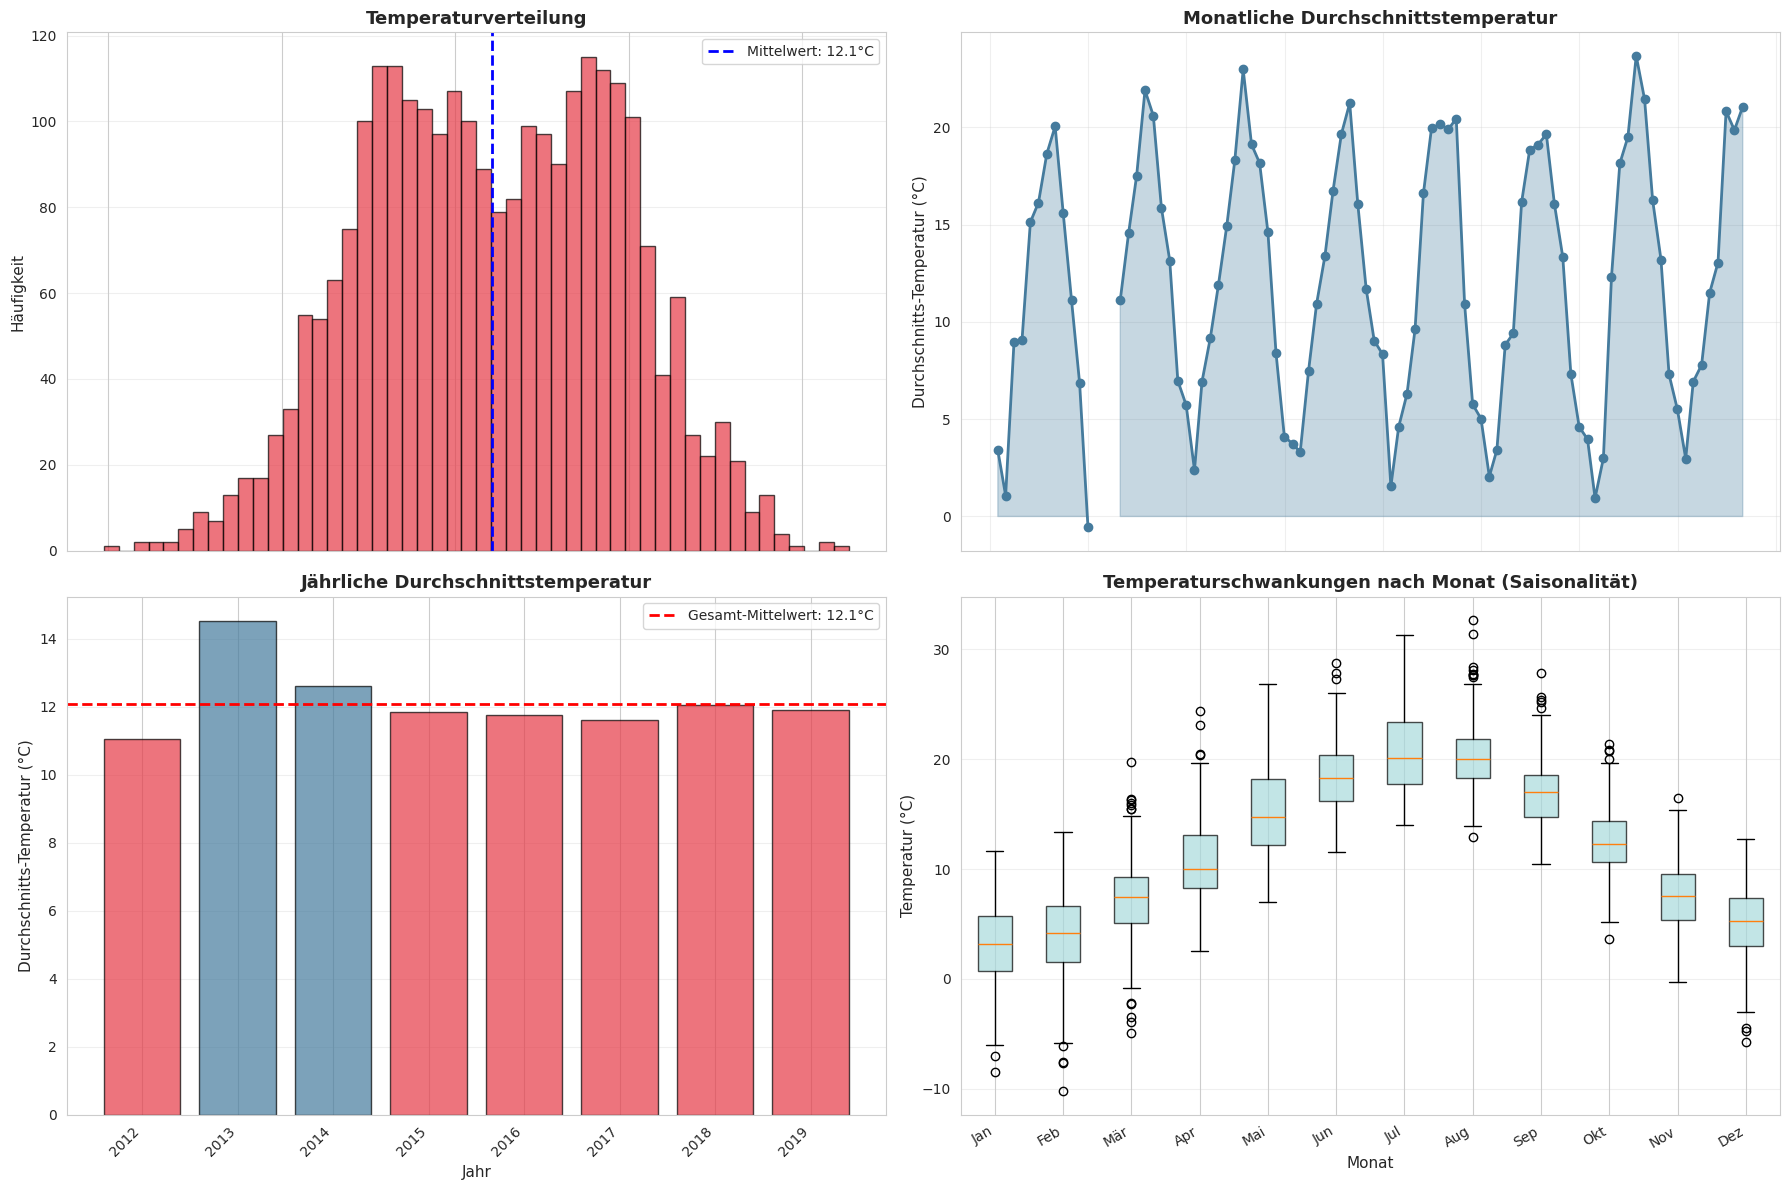

✓ Zusätzliche Visualisierungen erstellt


In [7]:
# Zusätzliche Visualisierungen
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Histogramm der Temperaturverteilung
ax1 = axes[0, 0]
ax1.hist(weather_df['Temperatur'], bins=50, color='#E63946', alpha=0.7, edgecolor='black')
ax1.set_title('Temperaturverteilung', fontsize=13, fontweight='bold')
ax1.set_xlabel('Temperatur (°C)', fontsize=11)
ax1.set_ylabel('Häufigkeit', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axvline(weather_df['Temperatur'].mean(), color='blue', linestyle='--', 
            linewidth=2, label=f'Mittelwert: {weather_df["Temperatur"].mean():.1f}°C')
ax1.legend()

# 2. Monatliche Durchschnitte
ax2 = axes[0, 1]
monthly_avg = weather_df_indexed['Temperatur'].resample('M').mean()
ax2.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, 
         markersize=6, color='#457B9D')
ax2.fill_between(monthly_avg.index, monthly_avg.values, alpha=0.3, color='#457B9D')
ax2.set_title('Monatliche Durchschnittstemperatur', fontsize=13, fontweight='bold')
ax2.set_xlabel('Datum', fontsize=11)
ax2.set_ylabel('Durchschnitts-Temperatur (°C)', fontsize=11)
ax2.grid(True, alpha=0.3)
fig.autofmt_xdate()

# 3. Jährliche Durchschnitte
ax3 = axes[1, 0]
yearly_avg = weather_df_indexed['Temperatur'].resample('Y').mean()
colors_year = ['#E63946' if x < weather_df['Temperatur'].mean() else '#457B9D' 
               for x in yearly_avg.values]
ax3.bar(range(len(yearly_avg)), yearly_avg.values, color=colors_year, alpha=0.7, edgecolor='black')
ax3.set_title('Jährliche Durchschnittstemperatur', fontsize=13, fontweight='bold')
ax3.set_xlabel('Jahr', fontsize=11)
ax3.set_ylabel('Durchschnitts-Temperatur (°C)', fontsize=11)
ax3.set_xticks(range(len(yearly_avg)))
ax3.set_xticklabels([str(d.year) for d in yearly_avg.index], rotation=45)
ax3.grid(True, alpha=0.3, axis='y')
ax3.axhline(weather_df['Temperatur'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Gesamt-Mittelwert: {weather_df["Temperatur"].mean():.1f}°C')
ax3.legend()

# 4. Box-Plot nach Monat (Saisonalität)
ax4 = axes[1, 1]
weather_df_copy = weather_df.copy()
weather_df_copy['Monat'] = weather_df_copy['Datum'].dt.month
month_names = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
weather_df_copy['Monat_Name'] = weather_df_copy['Monat'].map({i+1: month_names[i] for i in range(12)})

# Box-Plot
month_order = [month_names[i] for i in range(12)]
box_data = [weather_df_copy[weather_df_copy['Monat_Name'] == month]['Temperatur'].values 
            for month in month_order]
bp = ax4.boxplot(box_data, labels=month_order, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('#A8DADC')
    patch.set_alpha(0.7)
ax4.set_title('Temperaturschwankungen nach Monat (Saisonalität)', fontsize=13, fontweight='bold')
ax4.set_xlabel('Monat', fontsize=11)
ax4.set_ylabel('Temperatur (°C)', fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Zusätzliche Visualisierungen erstellt")

## 5. Zusätzliche Visualisierungen

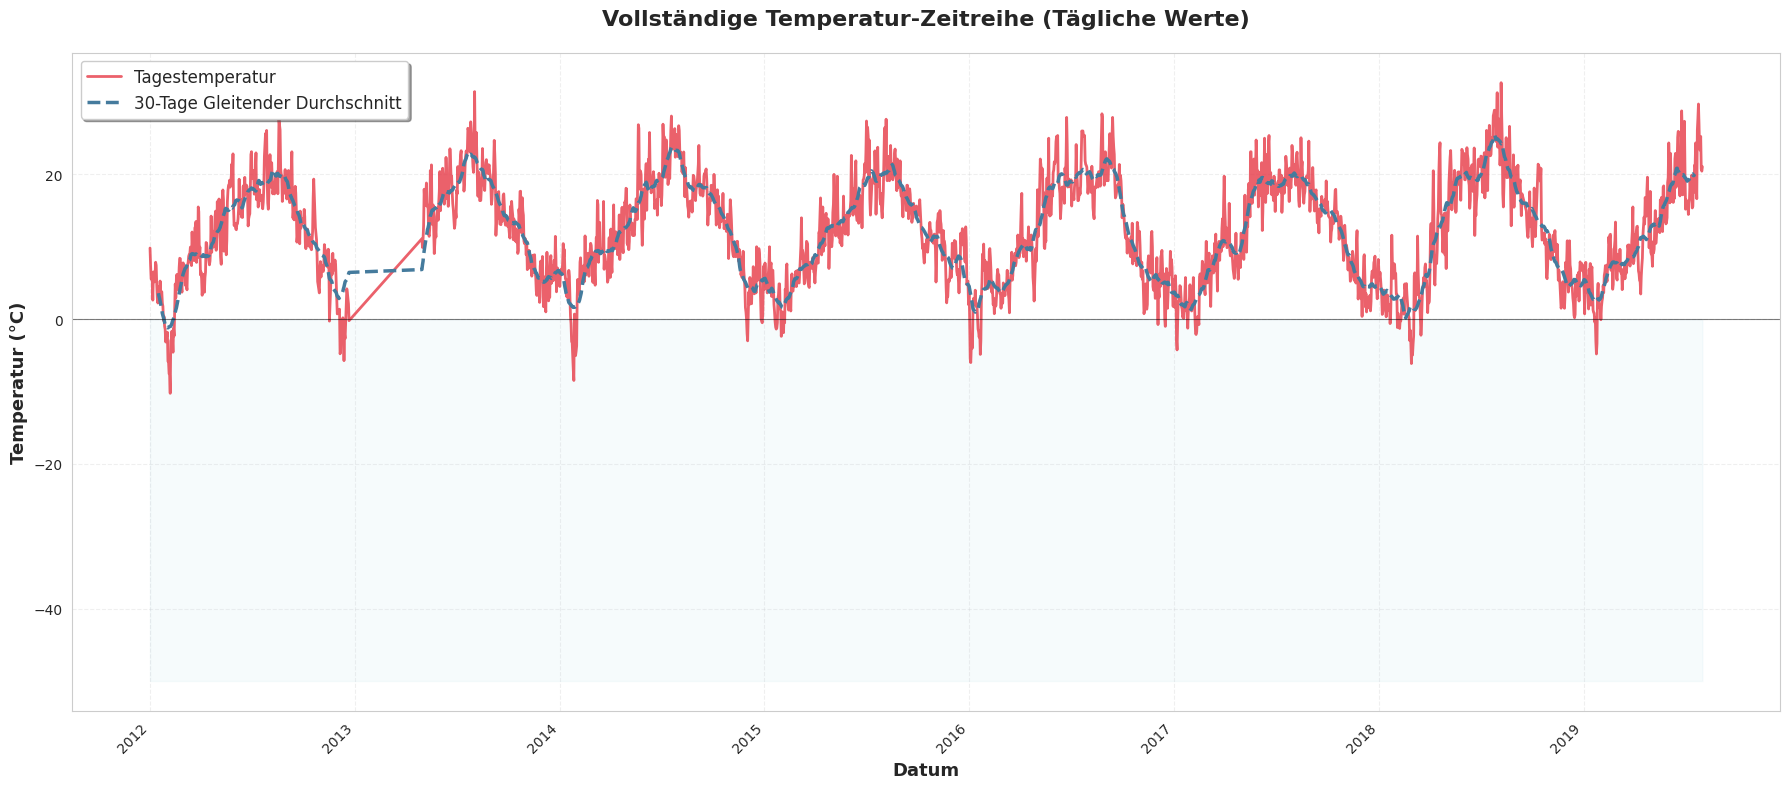

✓ Hauptgrafik erstellt


In [6]:
# Hauptgrafik: Temperaturverlauf über die gesamte Zeitreihe
fig, ax = plt.subplots(figsize=(18, 8))

# Temperaturlinie
ax.plot(weather_df_indexed.index, weather_df_indexed['Temperatur'], 
        linewidth=2, color='#E63946', label='Tagestemperatur', alpha=0.8)

# 30-Tage gleitender Durchschnitt
ma_30 = weather_df_indexed['Temperatur'].rolling(window=30, center=True).mean()
ax.plot(weather_df_indexed.index, ma_30, 
        linewidth=2.5, color='#457B9D', label='30-Tage Gleitender Durchschnitt', linestyle='--')

# Formatierung
ax.set_title('Vollständige Temperatur-Zeitreihe (Tägliche Werte)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Datum', fontsize=13, fontweight='bold')
ax.set_ylabel('Temperatur (°C)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)

# Hintergrundfarbe für Frost (unter 0°C)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
ax.fill_between(weather_df_indexed.index, -50, 0, alpha=0.1, color='lightblue', label='Frost-Bereich (<0°C)')

# Tick-Format
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

print("✓ Hauptgrafik erstellt")

## 4. Temperatur-Zeitreihen Visualisierung

In [5]:
# Datum als Index setzen und sortieren
weather_df = weather_df.sort_values('Datum').reset_index(drop=True)
weather_df_indexed = weather_df.set_index('Datum')

print(f"Zeitreihe vorbereitet:")
print(f"  Zeitraum: {weather_df_indexed.index.min()} bis {weather_df_indexed.index.max()}")
print(f"  Anzahl Beobachtungen: {len(weather_df_indexed)}")
print(f"✓ Daten sortiert und Index gesetzt")

Zeitreihe vorbereitet:
  Zeitraum: 2012-01-01 00:00:00 bis 2019-08-01 00:00:00
  Anzahl Beobachtungen: 2601
✓ Daten sortiert und Index gesetzt


## 3. Zeitreihendaten vorbereiten

In [4]:
# Datensatz-Informationen
print("=" * 80)
print("DATENSATZ-ÜBERSICHT")
print("=" * 80)
print(f"\nForm: {weather_df.shape}")
print(f"\nDatentypen:")
print(weather_df.dtypes)
print(f"\nFehlende Werte:")
print(weather_df.isnull().sum())
print(f"\nDatumbereich: {weather_df['Datum'].min()} bis {weather_df['Datum'].max()}")
print(f"\nTemperatur-Statistiken (°C):")
print(weather_df['Temperatur'].describe())
print(f"\n✓ Daten geladen und vorbereitet")

DATENSATZ-ÜBERSICHT

Form: (2601, 5)

Datentypen:
Datum                  datetime64[ns]
Bewoelkung                    float64
Temperatur                    float64
Windgeschwindigkeit             int64
Wettercode                    float64
dtype: object

Fehlende Werte:
Datum                    0
Bewoelkung              10
Temperatur               0
Windgeschwindigkeit      0
Wettercode             669
dtype: int64

Datumbereich: 2012-01-01 00:00:00 bis 2019-08-01 00:00:00

Temperatur-Statistiken (°C):
count    2601.000000
mean       12.099586
std         7.174357
min       -10.250000
25%         6.512500
50%        12.000000
75%        17.825000
max        32.671428
Name: Temperatur, dtype: float64

✓ Daten geladen und vorbereitet


## 2. Datensatz erkunden

In [3]:
# Wetter-CSV laden
weather_path = Path('wetter.csv')
if not weather_path.exists():
    weather_path = Path('./0_DataPreparation/wetter.csv')

print(f"Lade Datei: {weather_path}")
weather_df = pd.read_csv(weather_path, parse_dates=['Datum'])

print(f"\nDatensätze geladen: {len(weather_df)} Zeilen")
print(f"Spalten: {list(weather_df.columns)}")
print(f"\nErste 5 Zeilen:")
display(weather_df.head())
print(f"\nLast 5 Zeilen:")
display(weather_df.tail())

Lade Datei: wetter.csv

Datensätze geladen: 2601 Zeilen
Spalten: ['Datum', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']

Erste 5 Zeilen:


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0



Last 5 Zeilen:


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
2596,2019-07-28,3.0,23.3500,14,5.0
2597,2019-07-29,6.0,25.2500,7,61.0
2598,2019-07-30,7.0,20.7375,8,61.0
2599,2019-07-31,6.0,20.4500,7,61.0
2600,2019-08-01,5.0,21.0625,9,61.0


## 1. Wetterdaten laden

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Matplotlib Konfiguration für bessere Lesbarkeit
plt.rcParams['figure.figsize'] = (16, 8)
sns.set_style("whitegrid")

# Vollständige Temperatur-Zeitreihe Analyse

Analyse der Temperaturveränderungen über die gesamte Zeitreihe basierend auf der wetter.csv Datei.

Lade Datei: wetter_clipped.csv
✓ Daten geladen: 2207 Zeilen
  Zeitraum: 01.07.2013 bis 01.08.2019
  NA-Werte in Temperatur: 0 (0.00%)


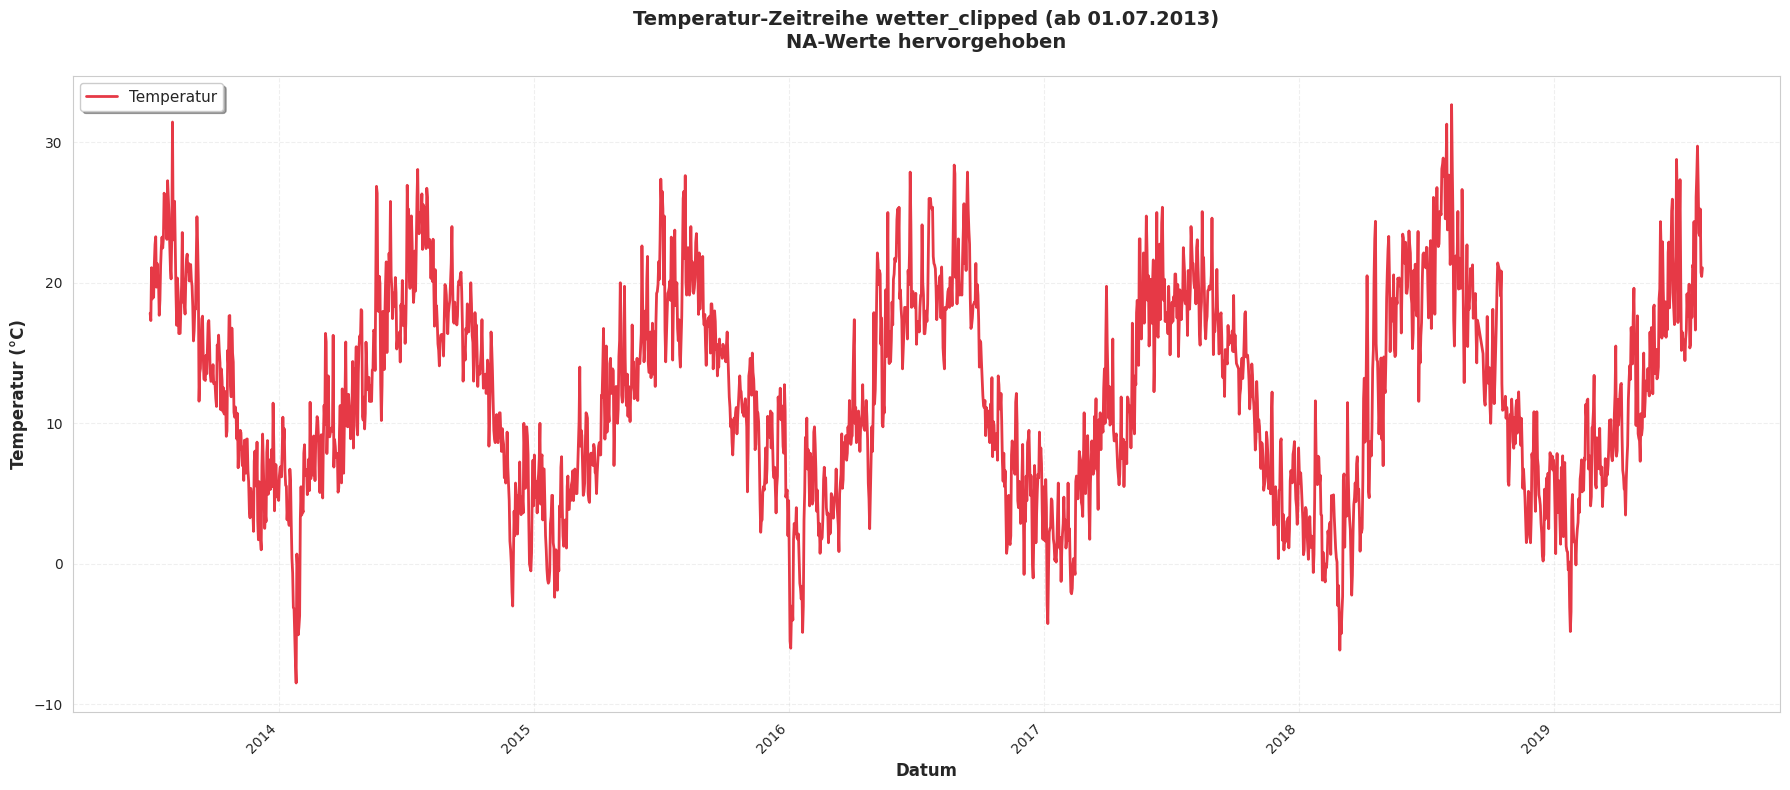


✓ Grafik erstellt mit 0 NA-Werte hervorgehoben


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path

# Lade wetter_clipped.csv
clipped_path = Path('wetter_clipped.csv')
if not clipped_path.exists():
    clipped_path = Path('./0_DataPreparation/wetter_clipped.csv')

print(f"Lade Datei: {clipped_path}")
weather_clipped = pd.read_csv(clipped_path, parse_dates=['Datum'])

# Finde NA-Werte in der Temperatur-Spalte
na_mask = weather_clipped['Temperatur'].isna()
na_count = na_mask.sum()

print(f"✓ Daten geladen: {len(weather_clipped)} Zeilen")
print(f"  Zeitraum: {weather_clipped['Datum'].min().strftime('%d.%m.%Y')} bis {weather_clipped['Datum'].max().strftime('%d.%m.%Y')}")
print(f"  NA-Werte in Temperatur: {na_count} ({na_count/len(weather_clipped)*100:.2f}%)")

# Erstelle die Grafik
fig, ax = plt.subplots(figsize=(18, 8))

# Plot Temperaturlinie
ax.plot(weather_clipped['Datum'], weather_clipped['Temperatur'], 
        linewidth=2, color='#E63946', label='Temperatur', zorder=2)

# Hebe NA-Werte hervor mit roten Bereichen
# Finde zusammenhängende Segmente mit NA-Werten
na_indices = weather_clipped[weather_clipped['Temperatur'].isna()].index
if len(na_indices) > 0:
    # Gruppiere aufeinanderfolgende NA-Indizes
    groups = []
    current_group = [na_indices[0]]
    
    for i in range(1, len(na_indices)):
        if na_indices[i] - na_indices[i-1] == 1:
            current_group.append(na_indices[i])
        else:
            groups.append(current_group)
            current_group = [na_indices[i]]
    groups.append(current_group)
    
    # Markiere NA-Bereiche mit vertikalen Streifen
    for group in groups:
        start_idx = group[0]
        end_idx = group[-1]
        
        start_date = weather_clipped.loc[start_idx, 'Datum']
        end_date = weather_clipped.loc[end_idx, 'Datum']
        
        ax.axvspan(start_date, end_date, alpha=0.3, color='red', zorder=1)
    
    # Markiere auch einzelne NA-Punkte mit X
    na_dates = weather_clipped[weather_clipped['Temperatur'].isna()]['Datum']
    ax.scatter(na_dates, [ax.get_ylim()[1]]*len(na_dates), marker='x', 
               s=100, color='red', linewidth=2, zorder=3, label=f'NA-Werte ({na_count})')

# Formatierung
ax.set_title('Temperatur-Zeitreihe wetter_clipped (ab 01.07.2013)\nNA-Werte hervorgehoben', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Datum', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatur (°C)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)

# Formatiere X-Achse
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n✓ Grafik erstellt mit {na_count} NA-Werte hervorgehoben")

## 7. Temperatur-Zeitreihe aus wetter_clipped.csv (ab 01.07.2013)

Wettercodes - Datenqualität:
  Gültige Werte: 1689 (76.53%) - inkl. Wettercode 0 (klar)
  NA-Werte (echte NaN): 518 (23.47%)

Wettercode-Häufigkeitsverteilung:
Wettercode
0.0     208
3.0       1
5.0     158
10.0    166
17.0      2
20.0     61
21.0    241
22.0     24
28.0     16
45.0     20
49.0     10
53.0     10
55.0      1
61.0    546
63.0    117
65.0     22
68.0      4
69.0      5
71.0     19
73.0      9
75.0      5
77.0      9
79.0      1
95.0     34
Name: count, dtype: int64


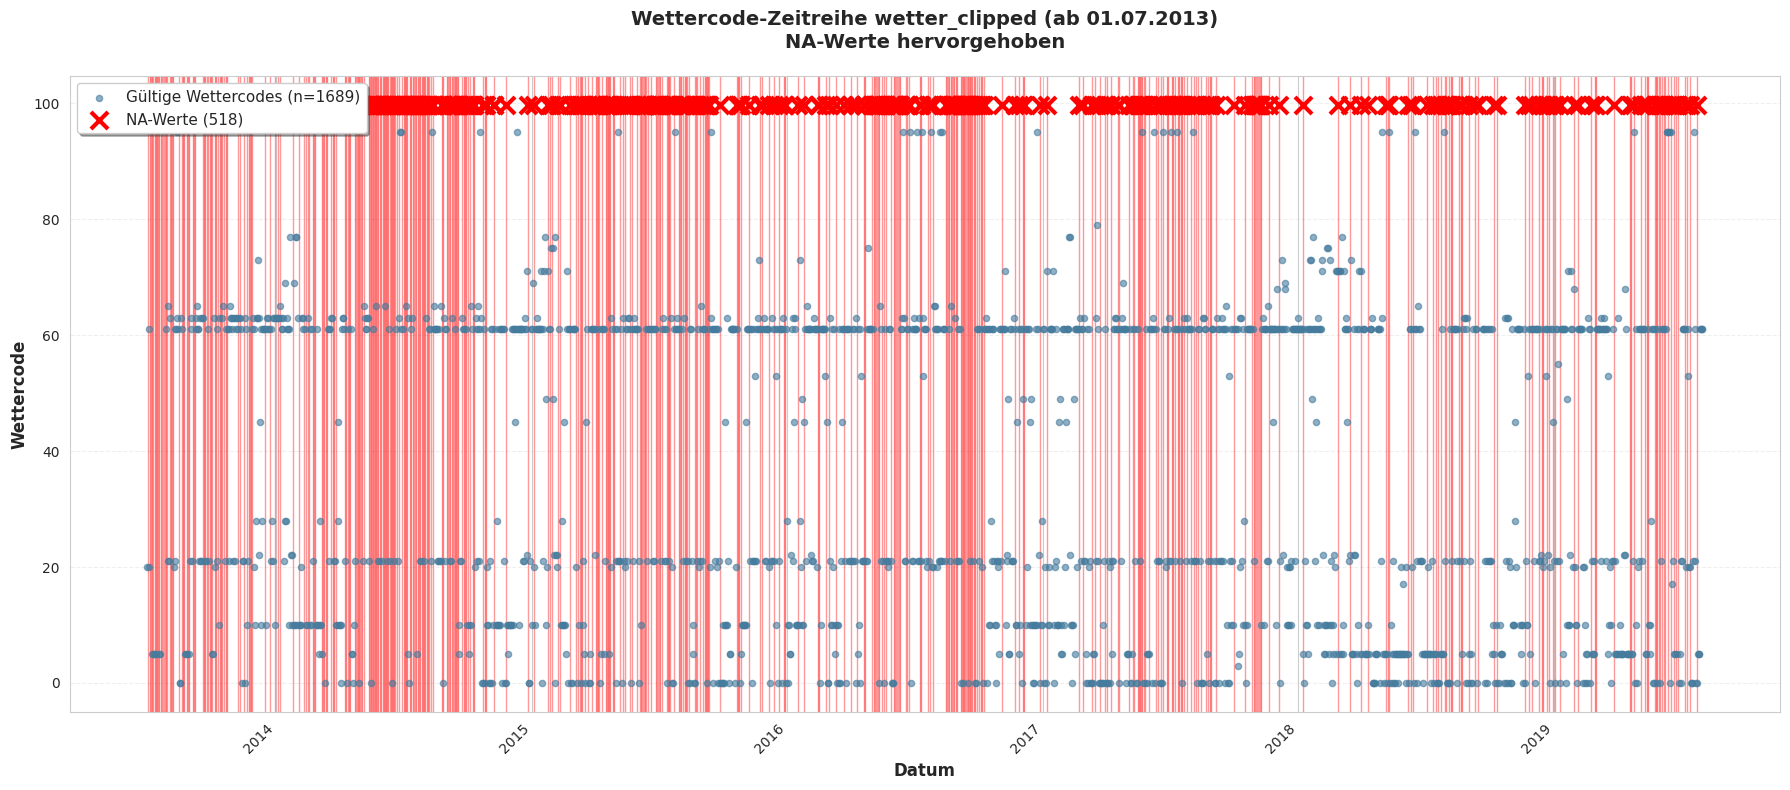


✓ Grafik erstellt mit 518 NA-Werte hervorgehoben


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Lade wetter_clipped.csv
clipped_path = Path('wetter_clipped.csv')
if not clipped_path.exists():
    clipped_path = Path('./0_DataPreparation/wetter_clipped.csv')

weather_clipped = pd.read_csv(clipped_path, parse_dates=['Datum'])

# Finde NA-Werte in der Wettercode-Spalte (Wettercode 0 ist KEIN NA!)
na_mask_code = weather_clipped['Wettercode'].isna()
na_count_code = na_mask_code.sum()
valid_count_code = (~na_mask_code).sum()

print(f"Wettercodes - Datenqualität:")
print(f"  Gültige Werte: {valid_count_code} ({valid_count_code/len(weather_clipped)*100:.2f}%) - inkl. Wettercode 0 (klar)")
print(f"  NA-Werte (echte NaN): {na_count_code} ({na_count_code/len(weather_clipped)*100:.2f}%)")

# Zeige Häufigkeitsverteilung der Wettercodes
print(f"\nWettercode-Häufigkeitsverteilung:")
code_counts = weather_clipped['Wettercode'].value_counts().sort_index()
print(code_counts)

# Erstelle die Grafik
fig, ax = plt.subplots(figsize=(18, 8))

# Plot gültige Wettercodes
valid_indices = ~na_mask_code
ax.scatter(weather_clipped[valid_indices]['Datum'], 
          weather_clipped[valid_indices]['Wettercode'],
          alpha=0.6, s=20, color='#457B9D', label=f'Gültige Wettercodes (n={valid_count_code})', zorder=2)

# Hebe NA-Werte hervor mit roten Bereichen
na_indices = weather_clipped[na_mask_code].index
if len(na_indices) > 0:
    # Gruppiere aufeinanderfolgende NA-Indizes
    groups = []
    current_group = [na_indices[0]]
    
    for i in range(1, len(na_indices)):
        if na_indices[i] - na_indices[i-1] == 1:
            current_group.append(na_indices[i])
        else:
            groups.append(current_group)
            current_group = [na_indices[i]]
    groups.append(current_group)
    
    # Markiere NA-Bereiche mit vertikalen roten Streifen
    for group in groups:
        start_idx = group[0]
        end_idx = group[-1]
        
        start_date = weather_clipped.loc[start_idx, 'Datum']
        end_date = weather_clipped.loc[end_idx, 'Datum']
        
        ax.axvspan(start_date, end_date, alpha=0.4, color='red', zorder=1)
    
    # Markiere auch NA-Punkte mit X
    na_dates = weather_clipped[na_mask_code]['Datum']
    ax.scatter(na_dates, [ax.get_ylim()[1]]*len(na_dates), marker='x', 
              s=150, color='red', linewidth=3, zorder=3, label=f'NA-Werte ({na_count_code})')

# Formatierung
ax.set_title('Wettercode-Zeitreihe wetter_clipped (ab 01.07.2013)\nNA-Werte hervorgehoben', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Datum', fontsize=12, fontweight='bold')
ax.set_ylabel('Wettercode', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)

# Formatiere X-Achse
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n✓ Grafik erstellt mit {na_count_code} NA-Werte hervorgehoben")

## 8. Wettercode-Zeitreihe mit NA-Wert-Hervorhebung

Wettercodes nach Imputation:
  Verbleibende NA-Werte: 0
  Gesamtwerte: 2207
  Datenqualität: 100.0% vollständig


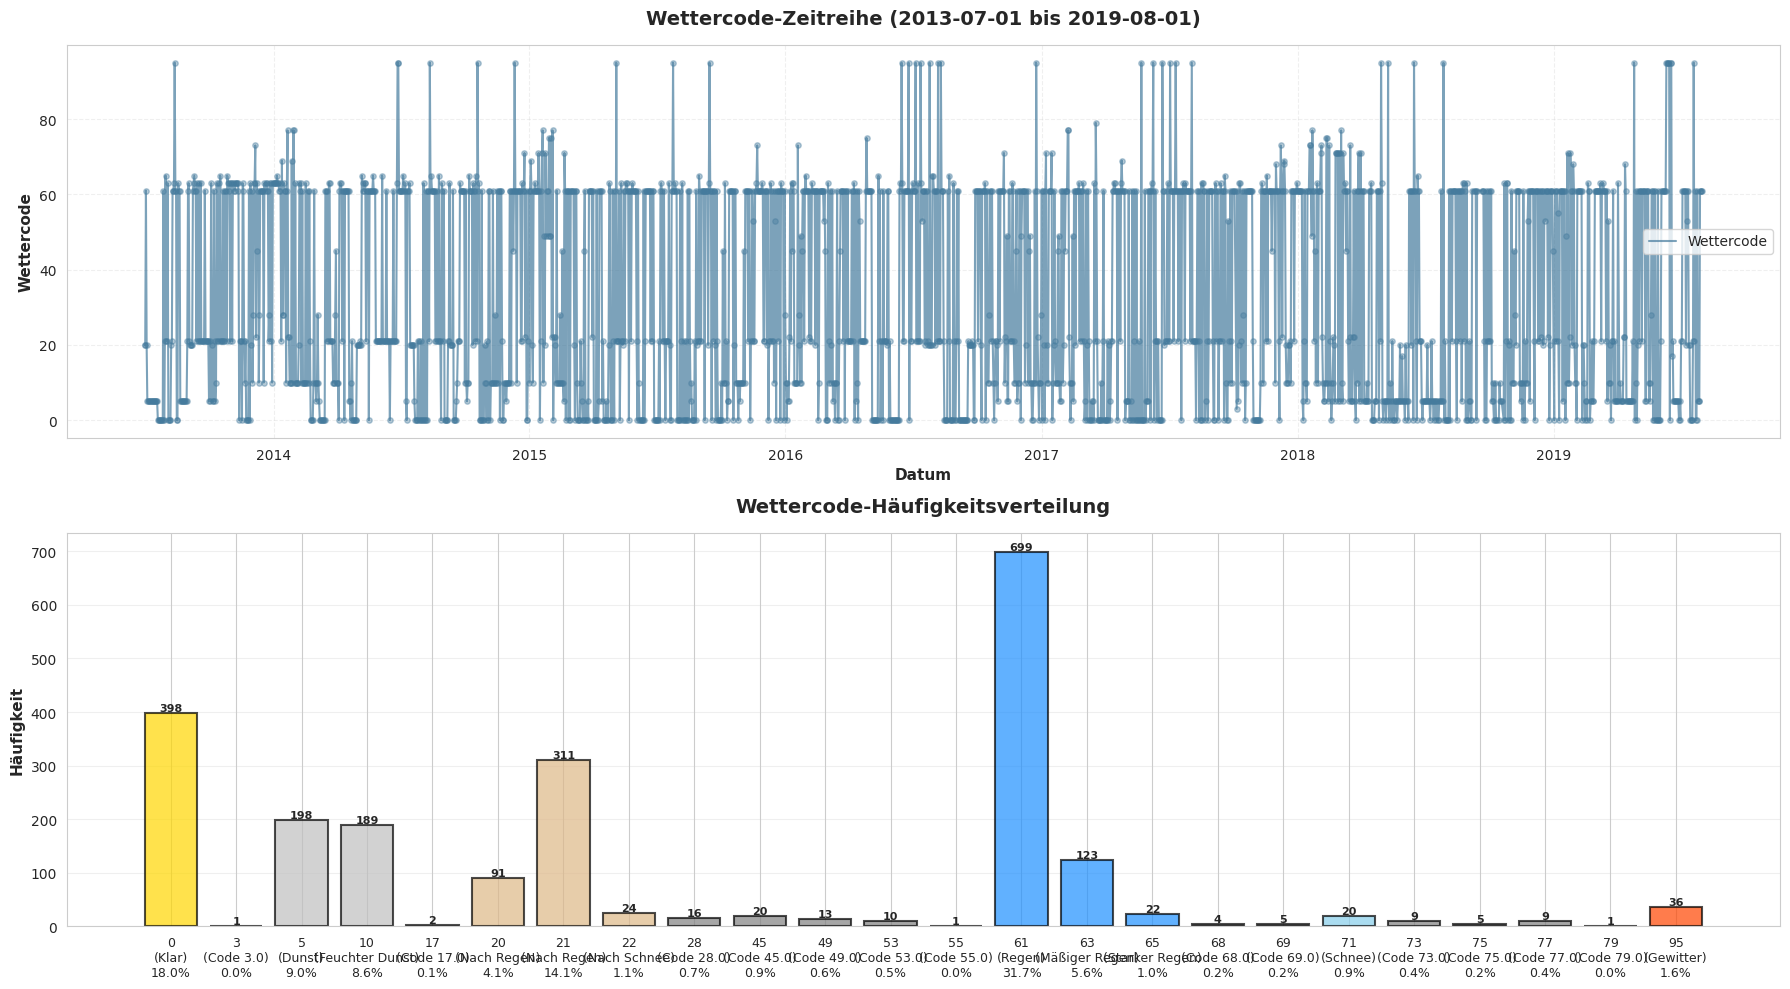


WETTERCODE-STATISTIK (Nach Imputation)

Häufigste Wettercodes:
  Code  0 (Klar                ):  398 Tage (18.03%)
  Code  3 (Code 3.0            ):    1 Tage ( 0.05%)
  Code  5 (Dunst               ):  198 Tage ( 8.97%)
  Code 10 (Feuchter Dunst      ):  189 Tage ( 8.56%)
  Code 17 (Code 17.0           ):    2 Tage ( 0.09%)
  Code 20 (Nach Regen          ):   91 Tage ( 4.12%)
  Code 21 (Nach Regen          ):  311 Tage (14.09%)
  Code 22 (Nach Schnee         ):   24 Tage ( 1.09%)
  Code 28 (Code 28.0           ):   16 Tage ( 0.72%)
  Code 45 (Code 45.0           ):   20 Tage ( 0.91%)

✓ Wettercode-Zeitreihe visualisiert


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Lade die GEFÜLLTE wetter_clipped.csv
clipped_path = Path('wetter_clipped.csv')
if not clipped_path.exists():
    clipped_path = Path('./0_DataPreparation/wetter_clipped.csv')

weather_filled = pd.read_csv(clipped_path, parse_dates=['Datum'])

# Prüfe auf NA-Werte
na_count_filled = weather_filled['Wettercode'].isna().sum()

print(f"Wettercodes nach Imputation:")
print(f"  Verbleibende NA-Werte: {na_count_filled}")
print(f"  Gesamtwerte: {len(weather_filled)}")
print(f"  Datenqualität: {(1 - na_count_filled/len(weather_filled))*100:.1f}% vollständig")

# Wettercode-Klassifikation für besseres Verständnis
wettercode_labels = {
    0.0: "Klar",
    5.0: "Dunst",
    10.0: "Feuchter Dunst",
    20.0: "Nach Regen",
    21.0: "Nach Regen",
    22.0: "Nach Schnee",
    61.0: "Regen",
    63.0: "Mäßiger Regen",
    65.0: "Starker Regen",
    71.0: "Schnee",
    95.0: "Gewitter"
}

# Erstelle die Hauptgrafik
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# --- Grafik 1: Wettercode als Linie ---
ax1.plot(weather_filled['Datum'], weather_filled['Wettercode'], 
         linewidth=1.5, color='#457B9D', alpha=0.7, label='Wettercode')
ax1.scatter(weather_filled['Datum'], weather_filled['Wettercode'], 
           s=15, alpha=0.4, color='#457B9D')

ax1.set_title('Wettercode-Zeitreihe (2013-07-01 bis 2019-08-01)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Datum', fontsize=11, fontweight='bold')
ax1.set_ylabel('Wettercode', fontsize=11, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=10)

# --- Grafik 2: Häufigkeitsverteilung der Wettercodes ---
code_freq = weather_filled['Wettercode'].value_counts().sort_index()

# Erstelle Labels für die häufigsten Codes
code_labels = []
for code in code_freq.index:
    label = wettercode_labels.get(code, f"Code {code}")
    count = code_freq[code]
    pct = count / len(weather_filled) * 100
    code_labels.append(f"{int(code)}\n({label})\n{pct:.1f}%")

# Farbcodierung basierend auf Wettertyp
def get_color_for_code(code):
    if code == 0.0:
        return '#FFD700'  # Klar (Gold)
    elif code in [5.0, 10.0]:
        return '#C0C0C0'  # Dunst (Silber)
    elif code in [20.0, 21.0, 22.0]:
        return '#DEB887'  # Nach Regen (Braun)
    elif code in [61.0, 63.0, 65.0]:
        return '#1E90FF'  # Regen (Royal Blue)
    elif code in [71.0]:
        return '#87CEEB'  # Schnee (Sky Blue)
    elif code == 95.0:
        return '#FF4500'  # Gewitter (Orange-Red)
    else:
        return '#808080'  # Sonstige (Grau)

colors = [get_color_for_code(code) for code in code_freq.index]

bars = ax2.bar(range(len(code_freq)), code_freq.values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(code_freq)))
ax2.set_xticklabels(code_labels, fontsize=9)
ax2.set_ylabel('Häufigkeit', fontsize=11, fontweight='bold')
ax2.set_title('Wettercode-Häufigkeitsverteilung', fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='y')

# Werte auf den Balken hinzufügen
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Detaillierte Statistik
print(f"\n{'='*80}")
print(f"WETTERCODE-STATISTIK (Nach Imputation)")
print(f"{'='*80}")
print(f"\nHäufigste Wettercodes:")
for code, count in code_freq.head(10).items():
    label = wettercode_labels.get(code, f"Code {code}")
    pct = count / len(weather_filled) * 100
    print(f"  Code {int(code):2d} ({label:20s}): {count:4d} Tage ({pct:5.2f}%)")

print(f"\n✓ Wettercode-Zeitreihe visualisiert")

## 9. Wettercode-Zeitreihe nach Imputation (Gefüllte Werte)